![Quora-1.png](attachment:Quora-1.png)

<h1 style="text-align:center;font-size:30px;" > Quora Question Pairs </h1>

<h1> 1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p>Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.</p>
<p>
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
</p>
<br>
> Credits: Kaggle 


__ Problem Statement __
- Identify which questions asked on Quora are duplicates of questions that have already been asked. 
- This could be useful to instantly provide answers to questions that have already been answered. 
- We are tasked with predicting whether a pair of questions are duplicates or not. 

<h2> 1.2 Sources/Useful Links</h2>

- Source : https://www.kaggle.com/c/quora-question-pairs
<br><br>____ Useful Links ____
- Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments
- Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0
- Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning
- Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30

<h2>1.3 Real world/Business Objectives and Constraints </h2>

1. The cost of a mis-classification can be very high.
2. You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3. No strict latency concerns.
4. Interpretability is partially important.

In [5]:
from google.colab import drive
drive.mount('/content/drive')
%cd ./drive/My Drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive


<h1>2. Machine Learning Probelm </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p> 
- Data will be in a file Train.csv <br>
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate <br>
- Size of Train.csv - 60MB <br>
- Number of rows in Train.csv = 404,290
</p>

<h3> 2.1.2 Example Data point </h3>

<pre>
"id","qid1","qid2","question1","question2","is_duplicate"
"0","1","2","What is the step by step guide to invest in share market in india?","What is the step by step guide to invest in share market?","0"
"1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?","What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"
"7","15","16","How can I be a good geologist?","What should I do to be a great geologist?","1"
"11","23","24","How do I read and find my YouTube comments?","How can I see all my Youtube comments?","1"
</pre>

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

<p> It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not. </p>

<h3> 2.2.2 Performance Metric </h3>

Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

Metric(s): 
* log-loss : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix

#Reading the data

In [6]:
!pip3 install fuzzywuzzy
!pip3 install distance
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
data = pd.read_csv("train.csv")

In [0]:
data=data[0:50000]

In [9]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [10]:
data.shape[0],data.shape[1]

(50000, 6)

<h2> 2.3 Train and Test Construction </h2>

<p>  </p>
<p> We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with. </p>

In [0]:
from sklearn.model_selection import train_test_split

df_train,df_test=train_test_split(data,test_size=0.25)




In [12]:
print(df_train.shape[0])
print(df_test.shape[0])

37500
12500


In [13]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
46036,46036,47257,60047,What Quora mean?,Why is Quora called Quora?,0
6903,6903,13510,13511,Why do I do drugs?,Why do drugs exist?,0
8970,8970,17457,17458,Is there a medication for Aspergers?,Is medication good for aspergers?,0
6285,6285,12321,12322,Is the demand to Shut Down JNU justified?,Is the demand to shut down JNU by a section of...,1
47581,47581,84932,84933,Which are the best institutions in India for a...,Which is the best institute in India for Compu...,1


In [14]:
#Checking whether there are any rows with null values
nan_rows = df_train[df_train.isnull().any(1)]
print (nan_rows)
# Filling the null values with ' '
df_train = df_train.fillna('')
nan_rows = df_train[df_train.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []
Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


In [15]:
#Test
#Checking whether there are any rows with null values
nan_rows = df_test[df_test.isnull().any(1)]
print (nan_rows)
# Filling the null values with ' '
df_test = df_test.fillna('')
nan_rows = df_test[df_test.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []
Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


<h2>3.3 Basic Feature Extraction (before cleaning) </h2>

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

<h2> 3.4 Preprocessing of Text </h2>

- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

In [0]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

<h2> 3.5 Advanced Feature Extraction (NLP and Fuzzy Features) </h2>

Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if First word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>





- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [0]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
    df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
    df['q1len'] = df['question1'].str.len() 
    df['q2len'] = df['question2'].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    df['word_Common'] = df.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    df['word_Total'] = df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['word_share'] = df.apply(normalized_word_share, axis=1)

    df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
    df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])


    
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [18]:
df_train_afe = extract_features(df_train)
df_test_afe=extract_features(df_test)

token features...
fuzzy features..
token features...
fuzzy features..


In [19]:
df_train_afe.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
46036,46036,47257,60047,what quora mean,why is quora called quora,0,1,2,16,26,3,5,1.0,8.0,0.125000,3,1,0.499975,0.499975,0.000000,0.000000,0.333322,0.199996,0.0,0.0,2.0,4.0,59,55,55,62,0.411765
6903,6903,13510,13511,why do i do drugs,why do drugs exist,0,1,1,18,19,5,4,2.0,8.0,0.250000,2,0,0.999900,0.499975,0.999950,0.666644,0.749981,0.599988,0.0,1.0,1.0,4.5,92,80,69,72,0.526316
8970,8970,17457,17458,is there a medication for aspergers,is medication good for aspergers,0,1,1,36,33,6,5,4.0,11.0,0.363636,2,0,0.999950,0.666644,0.999950,0.499988,0.799984,0.666656,1.0,1.0,1.0,5.5,92,81,81,85,0.441176
6285,6285,12321,12322,is the demand to shut down jnu justified,is the demand to shut down jnu by a section of...,1,1,1,41,128,8,24,8.0,30.0,0.266667,2,0,0.999975,0.333331,0.999975,0.399996,0.999988,0.333332,0.0,1.0,16.0,16.0,100,48,48,83,0.738095
47581,47581,84932,84933,which are the best institutions in india for a...,which is the best institute in india for compu...,1,1,1,94,64,18,12,8.0,29.0,0.275862,2,0,0.799984,0.571420,0.666656,0.444440,0.727266,0.444442,0.0,1.0,7.0,14.5,84,72,74,72,0.276923


<h2> 3.6 Featurizing text data with tfidf word-vectors </h2>

In [0]:
df_train['question1'] = df_train['question1'].apply(lambda x: str(x))
df_train['question2'] = df_train['question2'].apply(lambda x: str(x))
df_test['question1'] = df_test['question1'].apply(lambda x: str(x))
df_test['question2'] = df_test['question2'].apply(lambda x: str(x))

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions_train = list(df_train['question1']+df_train['question2'])
questions_test = list(df_test['question1']+df_test['question2'])

tfidf = TfidfVectorizer(lowercase=False,max_df=100,min_df=10 )
tfidf.fit(questions_train)
tfidf_train=tfidf.transform(questions_train)
tfidf_test=tfidf.transform(questions_test)

In [22]:
print(tfidf_train.shape)
print(tfidf_test.shape)
print(type(tfidf_train))

(37500, 4040)
(12500, 4040)
<class 'scipy.sparse.csr.csr_matrix'>


In [0]:
#https://stackoverflow.com/questions/44811405/pandas-concatenating-dataframe-with-sparse-matrix

tfidf_train= pd.SparseDataFrame(tfidf_train,columns=tfidf.get_feature_names(),default_fill_value=0)
tfidf_test=pd.SparseDataFrame(tfidf_test,columns=tfidf.get_feature_names(),default_fill_value=0)                   

In [24]:
print(tfidf_train.shape)
print(df_train_afe.shape)
print(type(tfidf_train))

(37500, 4040)
(37500, 32)
<class 'pandas.core.sparse.frame.SparseDataFrame'>


In [0]:
df_train_afe=df_train_afe.reset_index(drop=True)
df_test_afe=df_test_afe.reset_index(drop=True)

In [26]:
df_train_afe.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,46036,47257,60047,what quora mean,why is quora called quora,0,1,2,16,26,3,5,1.0,8.0,0.125000,3,1,0.499975,0.499975,0.000000,0.000000,0.333322,0.199996,0.0,0.0,2.0,4.0,59,55,55,62,0.411765
1,6903,13510,13511,why do i do drugs,why do drugs exist,0,1,1,18,19,5,4,2.0,8.0,0.250000,2,0,0.999900,0.499975,0.999950,0.666644,0.749981,0.599988,0.0,1.0,1.0,4.5,92,80,69,72,0.526316
2,8970,17457,17458,is there a medication for aspergers,is medication good for aspergers,0,1,1,36,33,6,5,4.0,11.0,0.363636,2,0,0.999950,0.666644,0.999950,0.499988,0.799984,0.666656,1.0,1.0,1.0,5.5,92,81,81,85,0.441176
3,6285,12321,12322,is the demand to shut down jnu justified,is the demand to shut down jnu by a section of...,1,1,1,41,128,8,24,8.0,30.0,0.266667,2,0,0.999975,0.333331,0.999975,0.399996,0.999988,0.333332,0.0,1.0,16.0,16.0,100,48,48,83,0.738095
4,47581,84932,84933,which are the best institutions in india for a...,which is the best institute in india for compu...,1,1,1,94,64,18,12,8.0,29.0,0.275862,2,0,0.799984,0.571420,0.666656,0.444440,0.727266,0.444442,0.0,1.0,7.0,14.5,84,72,74,72,0.276923


In [0]:
X_train=pd.concat([df_train_afe,tfidf_train],axis=1)
X_test=pd.concat([df_test_afe,tfidf_test],axis=1)


In [28]:
print(X_train.shape)
print(X_test.shape)

(37500, 4072)
(12500, 4072)


In [0]:
y_train= X_train['is_duplicate']
y_test=X_test['is_duplicate']

In [30]:
print(y_train.shape)

(37500,)


In [31]:
X_train.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,100k,10k,10th,11,11th,12th,13,14,...,withdraw,withdrawal,within,wives,won,wordpress,words,worked,workers,workout,works,worldwide,worried,worry,worrying,worse,worship,writer,writers,written,wrote,ww1,ww2,wwe,www,xbox,xiaomi,yahoo,yellow,yet,yoga,york,young,younger,yourself,youth,yrs,zealand,zero,zone
0,46036,47257,60047,what quora mean,why is quora called quora,0,1,2,16,26,3,5,1.0,8.0,0.125000,3,1,0.499975,0.499975,0.000000,0.000000,0.333322,0.199996,0.0,0.0,2.0,4.0,59,55,55,62,0.411765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6903,13510,13511,why do i do drugs,why do drugs exist,0,1,1,18,19,5,4,2.0,8.0,0.250000,2,0,0.999900,0.499975,0.999950,0.666644,0.749981,0.599988,0.0,1.0,1.0,4.5,92,80,69,72,0.526316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8970,17457,17458,is there a medication for aspergers,is medication good for aspergers,0,1,1,36,33,6,5,4.0,11.0,0.363636,2,0,0.999950,0.666644,0.999950,0.499988,0.799984,0.666656,1.0,1.0,1.0,5.5,92,81,81,85,0.441176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6285,12321,12322,is the demand to shut down jnu justified,is the demand to shut down jnu by a section of...,1,1,1,41,128,8,24,8.0,30.0,0.266667,2,0,0.999975,0.333331,0.999975,0.399996,0.999988,0.333332,0.0,1.0,16.0,16.0,100,48,48,83,0.738095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47581,84932,84933,which are the best institutions in india for a...,which is the best institute in india for compu...,1,1,1,94,64,18,12,8.0,29.0,0.275862,2,0,0.799984,0.571420,0.666656,0.444440,0.727266,0.444442,0.0,1.0,7.0,14.5,84,72,74,72,0.276923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
X_train.drop([ 'id','qid1','qid2','question1','question2','is_duplicate'], axis=1, inplace=True)
X_test.drop([ 'id','qid1','qid2','question1','question2','is_duplicate'], axis=1, inplace=True)

In [33]:
X_train.head()

,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,100k,10k,10th,11,11th,12th,13,14,150,15k,16,17,18,19,...,withdraw,withdrawal,within,wives,won,wordpress,words,worked,workers,workout,works,worldwide,worried,worry,worrying,worse,worship,writer,writers,written,wrote,ww1,ww2,wwe,www,xbox,xiaomi,yahoo,yellow,yet,yoga,york,young,younger,yourself,youth,yrs,zealand,zero,zone
0,1,2,16,26,3,5,1.0,8.0,0.125000,3,1,0.499975,0.499975,0.000000,0.000000,0.333322,0.199996,0.0,0.0,2.0,4.0,59,55,55,62,0.411765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,18,19,5,4,2.0,8.0,0.250000,2,0,0.999900,0.499975,0.999950,0.666644,0.749981,0.599988,0.0,1.0,1.0,4.5,92,80,69,72,0.526316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,36,33,6,5,4.0,11.0,0.363636,2,0,0.999950,0.666644,0.999950,0.499988,0.799984,0.666656,1.0,1.0,1.0,5.5,92,81,81,85,0.441176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,41,128,8,24,8.0,30.0,0.266667,2,0,0.999975,0.333331,0.999975,0.399996,0.999988,0.333332,0.0,1.0,16.0,16.0,100,48,48,83,0.738095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,94,64,18,12,8.0,29.0,0.275862,2,0,0.799984,0.571420,0.666656,0.444440,0.727266,0.444442,0.0,1.0,7.0,14.5,84,72,74,72,0.276923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(37500, 4065)
(37500,)
(12500, 4065)
(12500,)


In [0]:
#Standardize the data

from sklearn import preprocessing
# Get column names first
names = X_train.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_df, columns=names)






In [0]:

#Test
# Get column names first
names = X_test.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(X_test)
X_test = pd.DataFrame(scaled_df, columns=names)

In [37]:
X_train

,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,100k,10k,10th,11,11th,12th,13,14,150,15k,16,17,18,19,...,withdraw,withdrawal,within,wives,won,wordpress,words,worked,workers,workout,works,worldwide,worried,worry,worrying,worse,worship,writer,writers,written,wrote,ww1,ww2,wwe,www,xbox,xiaomi,yahoo,yellow,yet,yoga,york,young,younger,yourself,youth,yrs,zealand,zero,zone
0,-0.288846,1.257059,-1.450212,-0.997005,-1.457146,-0.968724,-1.124734,-1.513420,-0.763121,0.640101,1.092066,-0.279772,0.153973,-1.688117,-1.448006,-0.832788,-0.944720,-0.681878,-1.023039,-0.354496,-1.383719,-0.609283,-0.374840,-0.150110,-0.137513,0.102154,-0.023019,-0.031057,-0.030031,-0.043036,-0.020732,-0.034059,-0.035971,-0.037374,-0.019617,-0.030687,-0.042158,-0.035677,-0.038013,-0.026613,...,-0.020183,-0.01606,-0.044194,-0.017778,-0.043292,-0.032003,-0.044794,-0.019233,-0.01825,-0.027747,-0.043615,-0.021171,-0.022427,-0.020839,-0.021052,-0.024859,-0.015238,-0.035749,-0.018663,-0.039002,-0.019629,-0.016404,-0.022624,-0.018833,-0.022222,-0.024738,-0.019479,-0.032261,-0.022187,-0.038347,-0.019332,-0.028992,-0.039777,-0.021641,-0.046932,-0.019315,-0.019765,-0.018651,-0.032475,-0.027896
1,-0.288846,-0.285673,-1.383615,-1.202181,-1.090198,-1.125882,-0.803337,-1.513420,0.211046,-0.355081,-0.357066,1.337525,0.153973,1.273808,0.772217,0.736105,0.681753,-0.681878,0.977480,-0.556721,-1.288232,0.992115,0.932868,0.486266,0.393104,0.599762,-0.023019,-0.031057,-0.030031,-0.043036,-0.020732,-0.034059,-0.035971,-0.037374,-0.019617,-0.030687,-0.042158,-0.035677,-0.038013,-0.026613,...,-0.020183,-0.01606,-0.044194,-0.017778,-0.043292,-0.032003,-0.044794,-0.019233,-0.01825,-0.027747,-0.043615,-0.021171,-0.022427,-0.020839,-0.021052,-0.024859,-0.015238,-0.035749,-0.018663,-0.039002,-0.019629,-0.016404,-0.022624,-0.018833,-0.022222,-0.024738,-0.019479,-0.032261,-0.022187,-0.038347,-0.019332,-0.028992,-0.039777,-0.021641,-0.046932,-0.019315,-0.019765,-0.018651,-0.032475,-0.027896
2,-0.288846,-0.285673,-0.784241,-0.791828,-0.906724,-0.968724,-0.160544,-1.166829,1.096653,-0.355081,-0.357066,1.337686,0.763627,1.273808,0.217175,0.924385,0.952841,1.466537,0.977480,-0.556721,-1.097256,0.992115,0.985177,1.031731,1.082906,0.229918,-0.023019,-0.031057,-0.030031,-0.043036,-0.020732,-0.034059,-0.035971,-0.037374,-0.019617,-0.030687,-0.042158,-0.035677,-0.038013,-0.026613,...,-0.020183,-0.01606,-0.044194,-0.017778,-0.043292,-0.032003,-0.044794,-0.019233,-0.01825,-0.027747,-0.043615,-0.021171,-0.022427,-0.020839,-0.021052,-0.024859,-0.015238,-0.035749,-0.018663,-0.039002,-0.019629,-0.016404,-0.022624,-0.018833,-0.022222,-0.024738,-0.019479,-0.032261,-0.022187,-0.038347,-0.019332,-0.028992,-0.039777,-0.021641,-0.046932,-0.019315,-0.019765,-0.018651,-0.032475,-0.027896
3,-0.288846,-0.285673,-0.617749,1.992711,-0.539776,2.017283,1.125043,1.028248,0.340935,-0.355081,-0.357066,1.337767,-0.455588,1.273883,-0.115841,1.677481,-0.402541,-0.681878,0.977480,2.476642,0.907987,1.380332,-0.740999,-0.468297,0.976783,1.519728,-0.023019,-0.031057,-0.030031,-0.043036,-0.020732,-0.034059,-0.035971,-0.037374,-0.019617,-0.030687,-0.042158,-0.035677,-0.038013,-0.026613,...,-0.020183,-0.01606,-0.044194,-0.017778,-0.043292,-0.032003,-0.044794,-0.019233,-0.01825,-0.027747,-0.043615,-0.021171,-0.022427,-0.020839,-0.021052,-0.024859,-0.015238,-0.035749,-0.018663,-0.039002,-0.019629,-0.016404,-0.022624,-0.018833,-0.022222,-0.024738,-0.019479,-0.032261,-0.022187,-0.038347,-0.019332,-0.028992,-0.039777,-0.021641,-0.046932,-0.019315,-0.019765,-0.018651,-0.032475,-0.027896
4,-0.288846,-0.285673,1.147073,0.116811,1.294965,0.131384,1.125043,0.912718,0.412598,-0.355081,-0.357066,0.690781,0.415311,0.286566,0.032175,0.650573,0.049262,-0.681878,0.977480,0.656625,0.621523,0.603897,0.514402,0.7

In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [39]:
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

Class 0:  0.6289333333333333 Class 1:  0.37106666666666666
---------- Distribution of output variable in train data ----------
Class 0:  0.37872 Class 1:  0.37872


Log loss on Test Data using Random Model 0.8866800891022211


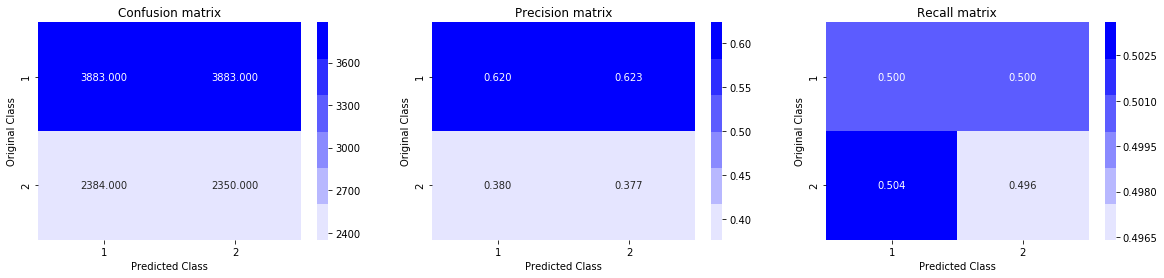

In [40]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

#Logistic Regression with hyperparameter tuning 

For values of alpha =  1e-05 The log loss is: 0.5470398012003502
For values of alpha =  0.0001 The log loss is: 0.5366359128719703
For values of alpha =  0.001 The log loss is: 0.4920774583921008
For values of alpha =  0.01 The log loss is: 0.47858478044794817
For values of alpha =  0.1 The log loss is: 0.4737503749188069
For values of alpha =  1 The log loss is: 0.4976778454103811
For values of alpha =  10 The log loss is: 0.5243890806706727


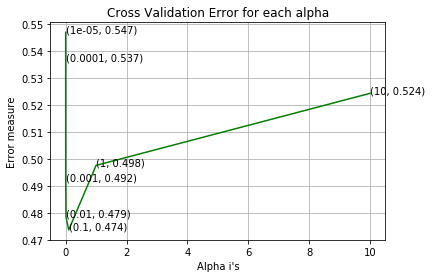

For values of best alpha =  0.1 The train log loss is: 0.4079769021538423
For values of best alpha =  0.1 The test log loss is: 0.47412357579388975
Total number of data points : 12500


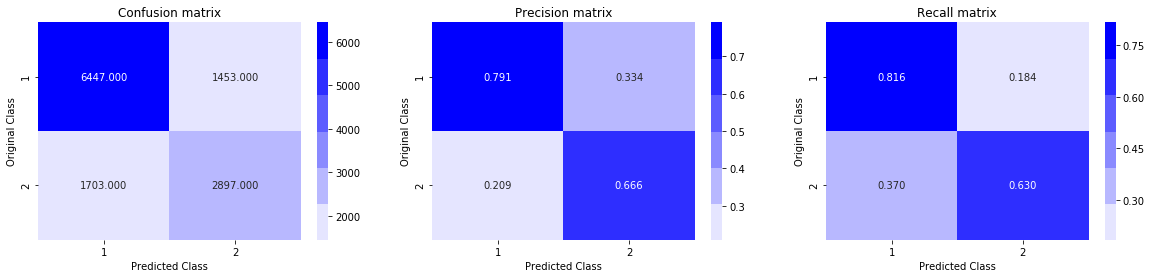

In [38]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log',class_weight ='balanced', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2>  Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.6635584953279854
For values of alpha =  0.0001 The log loss is: 0.5827881038270943
For values of alpha =  0.001 The log loss is: 0.632599457384758
For values of alpha =  0.01 The log loss is: 0.6628558935427534
For values of alpha =  0.1 The log loss is: 0.6632241388843334
For values of alpha =  1 The log loss is: 0.6634265702862369
For values of alpha =  10 The log loss is: 0.6635377700823614


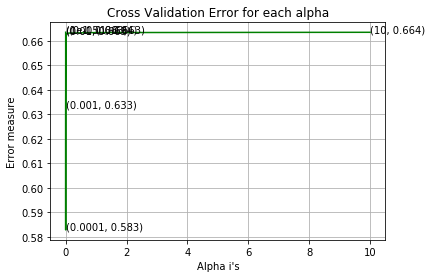

For values of best alpha =  0.0001 The train log loss is: 0.5502826246647671
For values of best alpha =  0.0001 The test log loss is: 0.586131654259812
Total number of data points : 12500


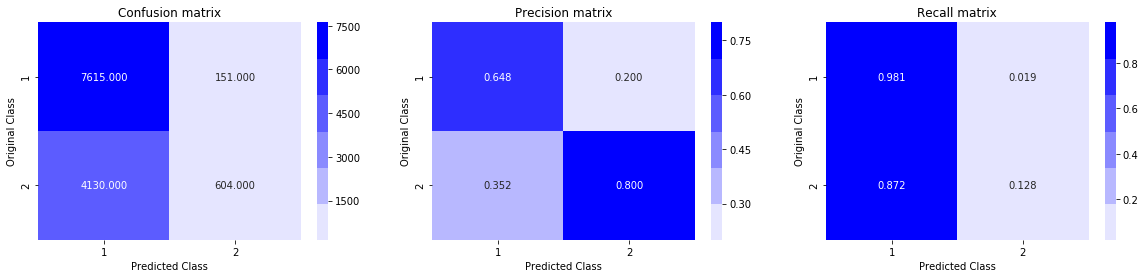

In [41]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge',class_weight ='balanced', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

1.Test log loss for logistic regression is 0.47

2.Test log loss for linear svm is 0.58

For values of alpha =  1e-05 The log loss is: 0.5169469999888603
For values of alpha =  0.0001 The log loss is: 0.5165304885581296
For values of alpha =  0.001 The log loss is: 0.5102183485626823
For values of alpha =  0.01 The log loss is: 0.48282411551124765
For values of alpha =  0.1 The log loss is: 0.4782271029067348
For values of alpha =  1 The log loss is: 0.5027972765374535
For values of alpha =  10 The log loss is: 0.5433434921423149


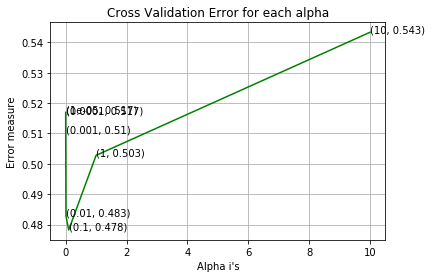

For values of best alpha =  0.1 The train log loss is: 0.4049801819606242
For values of best alpha =  0.1 The test log loss is: 0.4771584353256933
Total number of data points : 12500


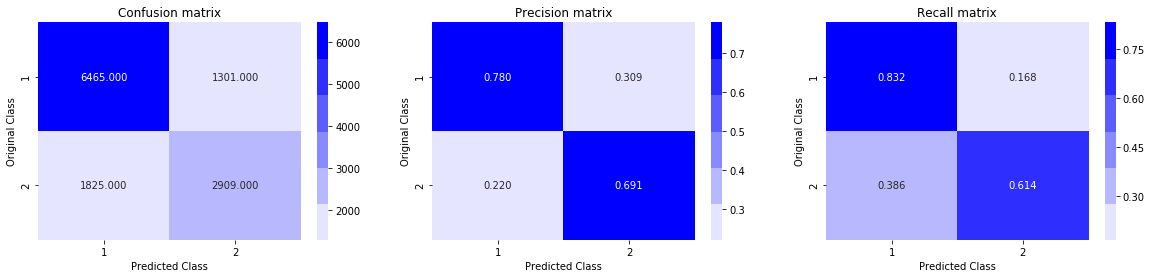

In [45]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log',class_weight ='balanced',learning_rate='invscaling',eta0 =0.1, random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  1e-05 The log loss is: 0.48201274305562763
For values of alpha =  0.0001 The log loss is: 0.4820030472790877
For values of alpha =  0.001 The log loss is: 0.4819069439049096
For values of alpha =  0.01 The log loss is: 0.48103479597585597
For values of alpha =  0.1 The log loss is: 0.4785356846390298
For values of alpha =  1 The log loss is: 0.5008524896984311
For values of alpha =  10 The log loss is: 0.5293501157987367


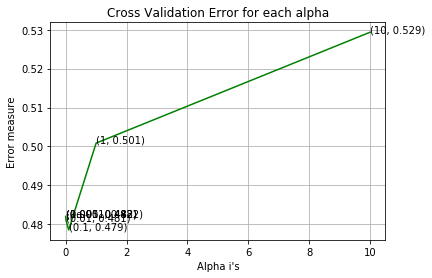

For values of best alpha =  0.1 The train log loss is: 0.4049801819606242
For values of best alpha =  0.1 The test log loss is: 0.4771584353256933
Total number of data points : 12500


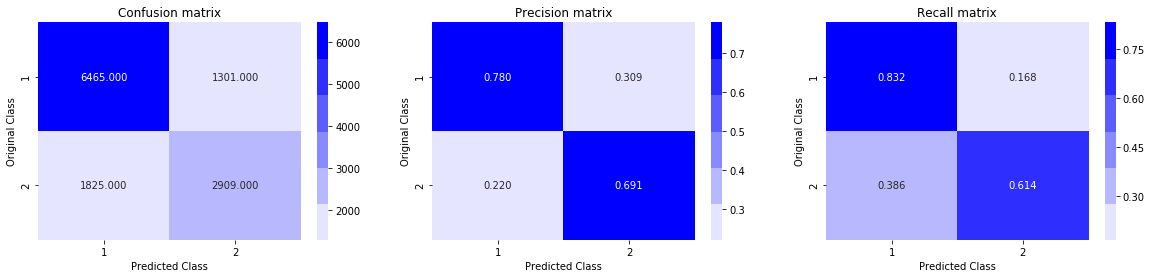

In [46]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log',class_weight ='balanced',learning_rate='invscaling',eta0 =0.01, random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  1e-05 The log loss is: 0.4986730612266795
For values of alpha =  0.0001 The log loss is: 0.49718277349161744
For values of alpha =  0.001 The log loss is: 0.4917639918226238
For values of alpha =  0.01 The log loss is: 0.5051952690890071
For values of alpha =  0.1 The log loss is: 0.537129727032264
For values of alpha =  1 The log loss is: 0.6635591703549996
For values of alpha =  10 The log loss is: 0.6635591703549993


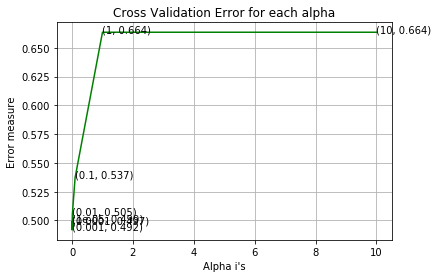

For values of best alpha =  0.001 The train log loss is: 0.5995021748632015
For values of best alpha =  0.001 The test log loss is: 0.6170247730392437
Total number of data points : 12500


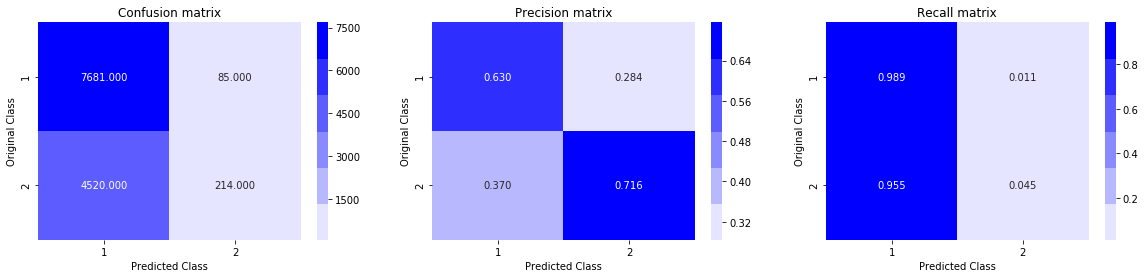

In [48]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge',class_weight ='balanced',learning_rate='invscaling',eta0 =0.01,random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  1e-05 The log loss is: 0.606728646075121
For values of alpha =  0.0001 The log loss is: 0.5972854212345278
For values of alpha =  0.001 The log loss is: 0.5220375290899368
For values of alpha =  0.01 The log loss is: 0.4833703538677805
For values of alpha =  0.1 The log loss is: 0.47739562948980374
For values of alpha =  1 The log loss is: 0.5009087864850593
For values of alpha =  10 The log loss is: 0.5279980471216718


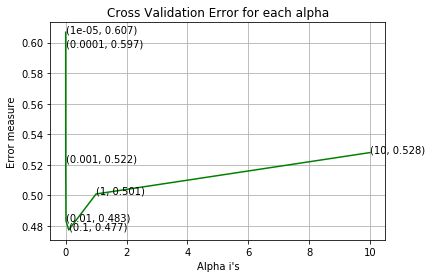

For values of best alpha =  0.1 The train log loss is: 0.4049801819606242
For values of best alpha =  0.1 The test log loss is: 0.4771584353256933
Total number of data points : 12500


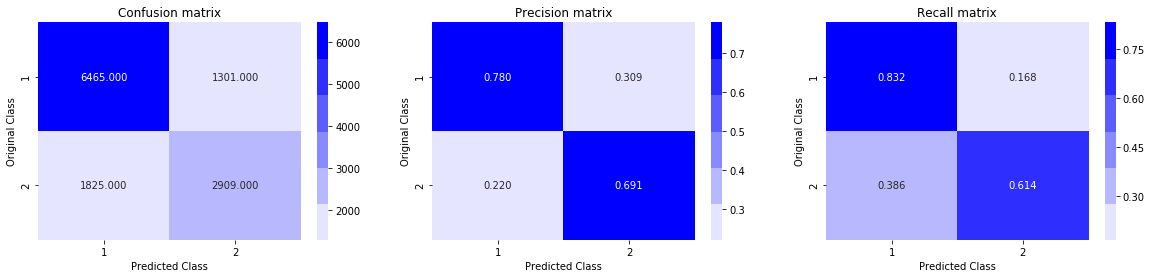

In [49]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log',class_weight ='balanced',learning_rate='adaptive',eta0 =0.01, random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

#Summary

In [5]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["ML Algorithm", "learning rate", "eta0", "LOSS"]

x.add_row(["Logistic Regression", 'optimal', 0.0, 0.474])
x.add_row(["Linear SVM ", 'optimal', 0.0, 0.586])
x.add_row(["Logistic Regression", 'invscaling', 0.1, 0.477])
x.add_row(["Logistic Regression", 'invscaling', 0.01, 0.477])
x.add_row(["Linear SVM ", 'invscaling', 0.01, 0.61])
x.add_row(["Logistic Regression", 'adaptive', 0.01, 0.477])




print(x)

+---------------------+---------------+------+-------+
|     ML Algorithm    | learning rate | eta0 |  LOSS |
+---------------------+---------------+------+-------+
| Logistic Regression |    optimal    | 0.0  | 0.474 |
|     Linear SVM      |    optimal    | 0.0  | 0.586 |
| Logistic Regression |   invscaling  | 0.1  | 0.477 |
| Logistic Regression |   invscaling  | 0.01 | 0.477 |
|     Linear SVM      |   invscaling  | 0.01 |  0.61 |
| Logistic Regression |    adaptive   | 0.01 | 0.477 |
+---------------------+---------------+------+-------+
